# Initialization

In [1]:
from cbrain.imports import *
from cbrain.data_generator import *
from cbrain.cam_constants import *
from cbrain.losses import *
from cbrain.utils import limit_mem
from cbrain.layers import *
from cbrain.data_generator import DataGenerator
import tensorflow as tf
import tensorflow.math as tfm
#import tensorflow_probability as tfp
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import xarray as xr
import numpy as np
from cbrain.model_diagnostics import ModelDiagnostics
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as imag
import scipy.integrate as sin
#import cartopy.crs as ccrs
import matplotlib.ticker as mticker
#from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import pickle
import sklearn
from sklearn.linear_model import LinearRegression
from scipy import stats

# Otherwise tensorflow will use ALL your GPU RAM for no reason
limit_mem()

/data11/home/tbeucler/CBRAIN-CAM/notebooks/tbeucler_devlog


# Plot sensitivity of convective heating and moistening to LTS/QM

Draws from [https://github.com/tbeucler/CBRAIN-CAM/blob/master/notebooks/tbeucler_devlog/025_SPCAM_UW_From_reduced_data.ipynb]

## Initialization

In [46]:
import math

import matplotlib as mpl
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import ConnectionPatch
from pylab import *

import numpy as np

import pickle

import xarray as xr

In [4]:
pathPKL = '/export/home/tbeucler/CBRAIN-CAM/notebooks/tbeucler_devlog/PKL_DATA/'

## Load data

In [10]:
NNname = 'STAB'
path = pathPKL+'9_30_Fig2_'+NNname+'.pkl'
hf = open(path,'rb')
S = pickle.load(hf)

In [11]:
NNname = 'STAB'
path = pathPKL+'9_30_Fig3_'+NNname+'.pkl'
hf = open(path,'rb')
S34 = pickle.load(hf)

In [12]:
path = pathPKL+'11_2_SPCAM_coordinates.pkl'
hf = open(path,'rb')
Scoor = pickle.load(hf)

## Fixed mid-tropospheric moisture, varied LTS

In [94]:
fz = 40
lw = 8

plt.rc('text', usetex=False)
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif', size=fz)
mpl.rcParams['lines.linewidth'] = lw
plt.close('all')

In [95]:
# Determine range of lower-tropospheric stabilities for which count>0
n = 0
for iLTS,edgeLTS in enumerate(S['LTSspace']):
        if iLTS*S['Whist'][iQM,iLTS-1]>0: 
            if n==0: iLTSmin = iLTS
            n+=1
            iLTSmax = iLTS

colors = pl.cm.viridis(np.linspace(0,1,n))
colors = colors[::-1,:] # Flip color palette to have moist in blue like Noah

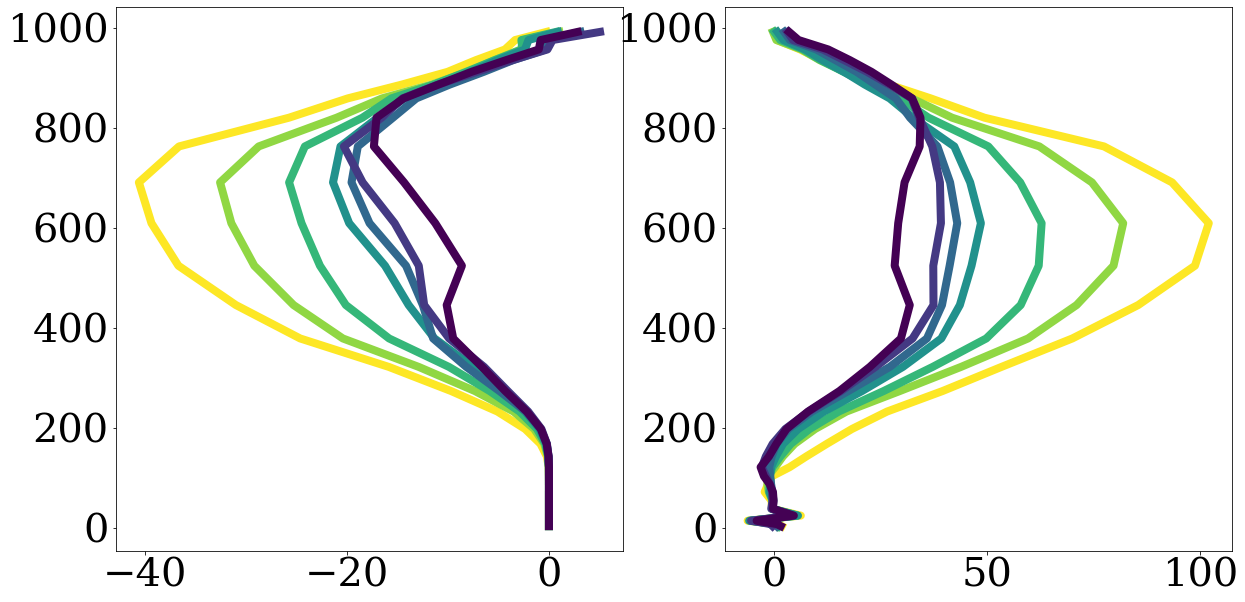

In [96]:
iQM = 16 # Choose fixed mid-tropospheric moisture value

fig,ax = plt.subplots(1,2,figsize=(20,10))

ncol = 0
for iLTS,edgeLTS in enumerate(S['LTSspace']):
        if iLTS*S['Whist'][iQM,iLTS-1]>0: 
            ncol+=1
            
            Y = 1e3*24*3600*S34['dqdthist'][NNname]
            ax[0].plot(Y[iQM,iLTS-1,:],Scoor['lev'],color=colors[ncol-1])

            Y = 24*3600*S34['dTdthist'][NNname]
            ax[1].plot(Y[iQM,iLTS-1,:],Scoor['lev'],color=colors[ncol-1])
            
plt.draw()
Q_LIM = ax[0].get_xlim()
T_LIM = ax[1].get_xlim()

In [97]:
S['LTSspace']

array([ 7.        ,  7.84210526,  8.68421053,  9.52631579, 10.36842105,
       11.21052632, 12.05263158, 12.89473684, 13.73684211, 14.57894737,
       15.42105263, 16.26315789, 17.10526316, 17.94736842, 18.78947368,
       19.63157895, 20.47368421, 21.31578947, 22.15789474, 23.        ])

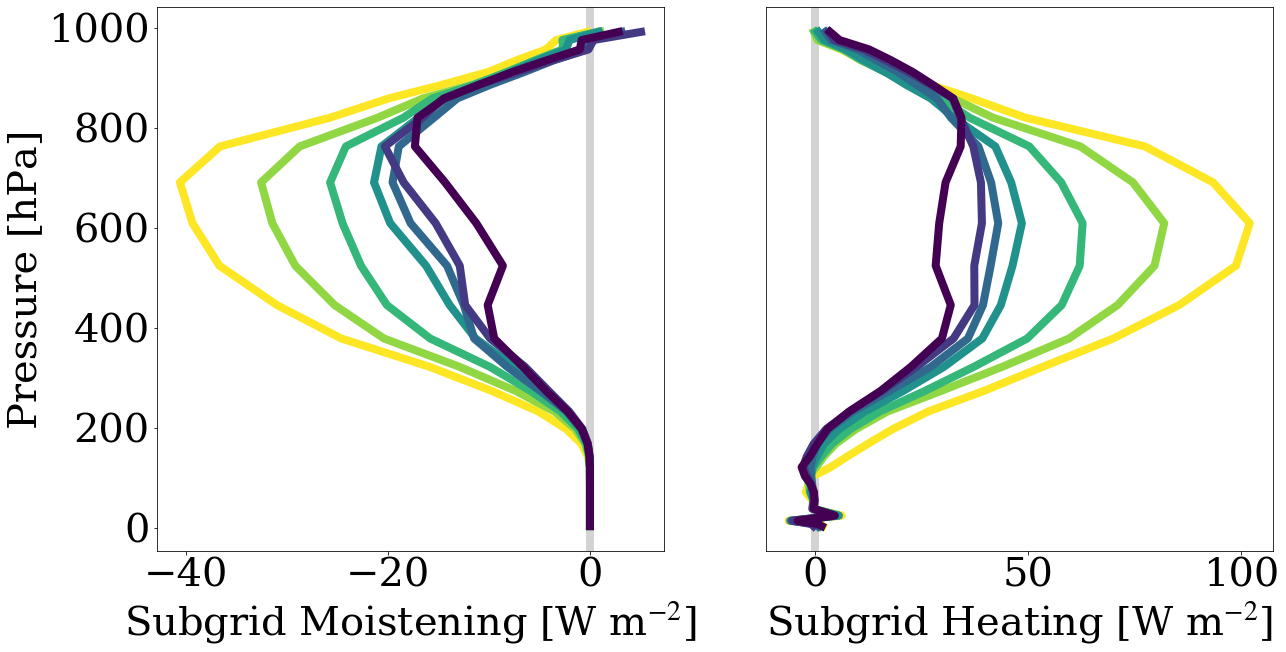

In [105]:
iQM = 16 # Choose fixed mid-tropospheric moisture value

fig,ax = plt.subplots(1,2,figsize=(20,10))

ncol = 0
for iLTS,edgeLTS in enumerate(S['LTSspace']):
        if iLTS*S['Whist'][iQM,iLTS-1]>0: 
            ncol+=1
            
            Y = 1e3*24*3600*S34['dqdthist'][NNname]
            ax[0].plot(Y[iQM,iLTS-1,:],Scoor['lev'],color=colors[ncol-1])
            ax[0].axvline(x=0,color='lightgray',zorder=0)
            ax[0].set_xlim(Q_LIM)
            ax[0].set_xlabel('Subgrid Moistening [W m$^{-2}$]')
            ax[0].set_ylabel('Pressure [hPa]')

            Y = 24*3600*S34['dTdthist'][NNname]
            ax[1].plot(Y[iQM,iLTS-1,:],Scoor['lev'],color=colors[ncol-1])
            ax[1].axvline(x=0,color='lightgray',zorder=0)
            ax[1].set_xlim(T_LIM)
            ax[1].get_yaxis().set_ticks([])
            ax[1].set_xlabel('Subgrid Heating [W m$^{-2}$]')
            
            if ncol==8: 
                ax[0].invert_yaxis(); ax[1].invert_yaxis()
                ax[0].annotate('LTS = '+'%02.1f'%(0.5*(S['LTSspace'][ncol]+S['LTSspace'][ncol-1]))+'K',
                               xy=(1.1, 1.05), xycoords='axes fraction',
                               xytext=(-20, 20), textcoords='offset pixels',
                               horizontalalignment='center',
                               verticalalignment='center',
                              color=colors[ncol-1]) 
                ax[0].annotate('Fixed QM = '+'%02.1f'%(S['QMspace'][iQM])+'kg/m$^{2}$',
                               xy=(0.25, 1.05), xycoords='axes fraction',
                               xytext=(-20, 20), textcoords='offset pixels',
                               horizontalalignment='center',
                               verticalalignment='center',
                              color='k')
                
                stop
            

## Fixed LTS, varied mid-tropospheric moisture

In [106]:
iLTS = 5 # Choose fixed lower-tropospheric stability

# Determine range of mid-tropospheric moistures for which count>0
n = 0
for iQM,edgeQM in enumerate(S['QMspace']):
        if iQM*S['Whist'][iQM-1,iLTS]>0: 
            if n==0: iQMmin = iQM
            n+=1
            iQMmax = iQM
colors = pl.cm.Blues(np.linspace(0,1,n))

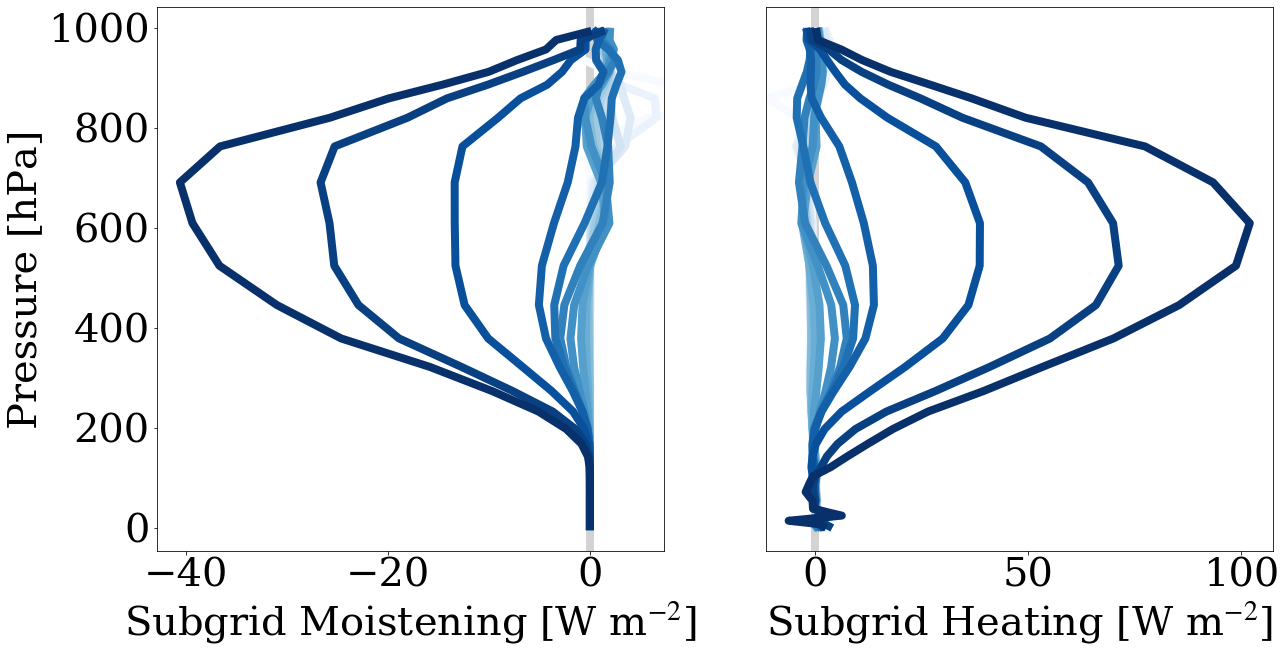

In [109]:
iLTS = 5
fig,ax = plt.subplots(1,2,figsize=(20,10))

ncol = 0
for iQM,edgeQM in enumerate(S['QMspace']):
        if iQM*S['Whist'][iQM-1,iLTS]>0:
            ncol+=1
            
            Y = 1e3*24*3600*S34['dqdthist'][NNname]
            ax[0].plot(Y[iQM-1,iLTS,:],Scoor['lev'],color=colors[ncol-1])
            ax[0].axvline(x=0,color='lightgray',zorder=0)
            ax[0].set_xlim(Q_LIM)
            ax[0].set_xlabel('Subgrid Moistening [W m$^{-2}$]')
            ax[0].set_ylabel('Pressure [hPa]')

            Y = 24*3600*S34['dTdthist'][NNname]
            ax[1].plot(Y[iQM-1,iLTS,:],Scoor['lev'],color=colors[ncol-1])
            ax[1].axvline(x=0,color='lightgray',zorder=0)
            ax[1].set_xlim(T_LIM)
            ax[1].get_yaxis().set_ticks([])
            ax[1].set_xlabel('Subgrid Heating [W m$^{-2}$]')

plt.draw()
Q_LIM = ax[0].get_xlim()
T_LIM = ax[1].get_xlim()

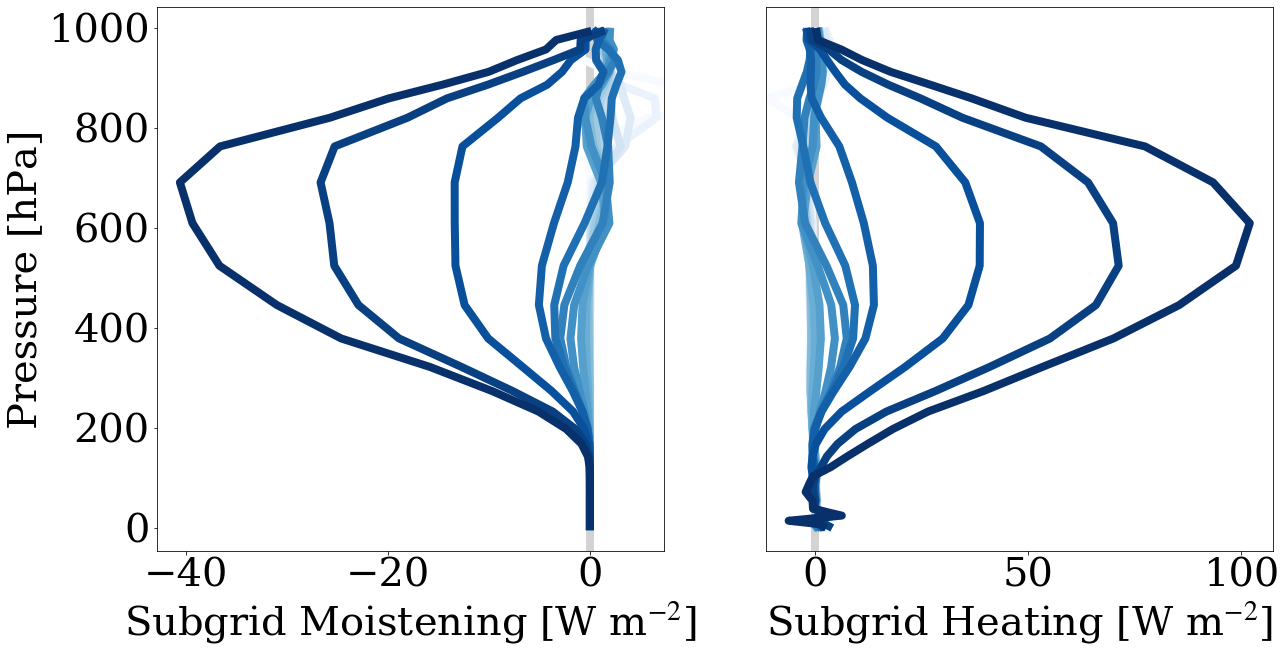

In [127]:
iLTS = 5
fig,ax = plt.subplots(1,2,figsize=(20,10))

ncol = 0
for iQM,edgeQM in enumerate(S['QMspace']):
        if iQM*S['Whist'][iQM-1,iLTS]>0:
            ncol+=1
            
            Y = 1e3*24*3600*S34['dqdthist'][NNname]
            ax[0].plot(Y[iQM-1,iLTS,:],Scoor['lev'],color=colors[ncol-1])
            ax[0].axvline(x=0,color='lightgray',zorder=0)
            ax[0].set_xlim(Q_LIM)
            ax[0].set_xlabel('Subgrid Moistening [W m$^{-2}$]')
            ax[0].set_ylabel('Pressure [hPa]')

            Y = 24*3600*S34['dTdthist'][NNname]
            ax[1].plot(Y[iQM-1,iLTS,:],Scoor['lev'],color=colors[ncol-1])
            ax[1].axvline(x=0,color='lightgray',zorder=0)
            ax[1].set_xlim(T_LIM)
            ax[1].get_yaxis().set_ticks([])
            ax[1].set_xlabel('Subgrid Heating [W m$^{-2}$]')
            
            if ncol==18: 
                ax[0].invert_yaxis(); ax[1].invert_yaxis()
                ax[0].annotate('QM = '+'%02.1f'%(0.5*(S['QMspace'][ncol]+S['QMspace'][ncol-1]))+'kg/m$^{2}$',
                               xy=(1.1, 1.05), xycoords='axes fraction',
                               xytext=(-20, 20), textcoords='offset pixels',
                               horizontalalignment='center',
                               verticalalignment='center',
                              color=colors[ncol-1]) 
                ax[0].annotate('Fixed LTS = '+'%02.1f'%(S['LTSspace'][iLTS])+'K',
                               xy=(0.25, 1.05), xycoords='axes fraction',
                               xytext=(-20, 20), textcoords='offset pixels',
                               horizontalalignment='center',
                               verticalalignment='center',
                              color='k')
                
                stop
            